In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

%matplotlib inline
plt.rcParams['figure.dpi'] = 144
plt.style.use('fivethirtyeight')

# Questions
- Are longstanding current themes more likely to have a greater number of set releases per year?
- Has the price per piece increased over time? (Pick a specific theme, e.g. Star Wars)
    - Does this align with inflation? (Pick a specific currency)
- Are some themes more expensive than others? (Pick a specific year range)

In [78]:
curr_themes = ['Architecture', 'Brick Sketches', 'BrickHeadz', 'City', 'Classic', \
               'Collectable Minifigures', 'Creator', 'Creator Expert', 'DC Comics Super Heroes' \
                'Disney', 'DOTS', 'Duplo', 'Education', 'Friends', 'Harry Potter', \
               'Hidden Side', 'Ideas', 'Jurassic World', 'LEGO Art', 'Marvel Super Heroes', \
               'Mindstorms', 'Minecraft', 'Minions: The Rise of Gru', 'Monkie Kid', 'Ninjago' \
               'Overwatch', 'Powered Up', 'Speed Champions', 'Star Wars', 'Super Heroes', \
               'Super Mario', 'Technic ', 'Trolls World Tour']


data = pd.read_csv('allsets.csv')
print('Table has shape:', data.shape)
data.head()

Table has shape: (16806, 24)


,SetID,Number,Variant,ThemeGroup,Theme,SubTheme,Year,Name,Minifigs,Pieces,...,Image,ImageFilename,EAN,UPC,PackagingType,Availability,InstructionsCount,AdditionalImageCount,AgeMin,AgeMax
0,22667,001,1,Vintage themes,Samsonite,Basic Set,1965,Gears,NaN,43.0,...,True,001-1,NaN,NaN,Box,Retail,0,0,5.0,12.0
1,22683,1,3,Vintage themes,Samsonite,Basic Set,1967,Promotional Set No. 1 (Kraft Velveeta),NaN,74.0,...,True,1-3,NaN,NaN,Box,Promotional,0,0,NaN,NaN
2,7465,1,7,Basic,Universal Building Set,NaN,1973,Basic Set,NaN,107.0,...,True,1-7,NaN,NaN,{Not specified},{Not specified},0,0,NaN,NaN
3,7693,1,8,Vintage themes,Minitalia,NaN,1970,Small house set,NaN,67.0,...,True,1-8,NaN,NaN,{Not specified},{Not specified},0,0,NaN,NaN
4,22697,1,9,Basic,System,Basic Set,1969,Set No 1 - Quaker/Life Cereal,NaN,301.0,...,False,NaN,NaN,NaN,Box,{Not specified},0,0,NaN,NaN


## Visualizing numerical values: Year, Minifigs, Pieces, USRetailPrice

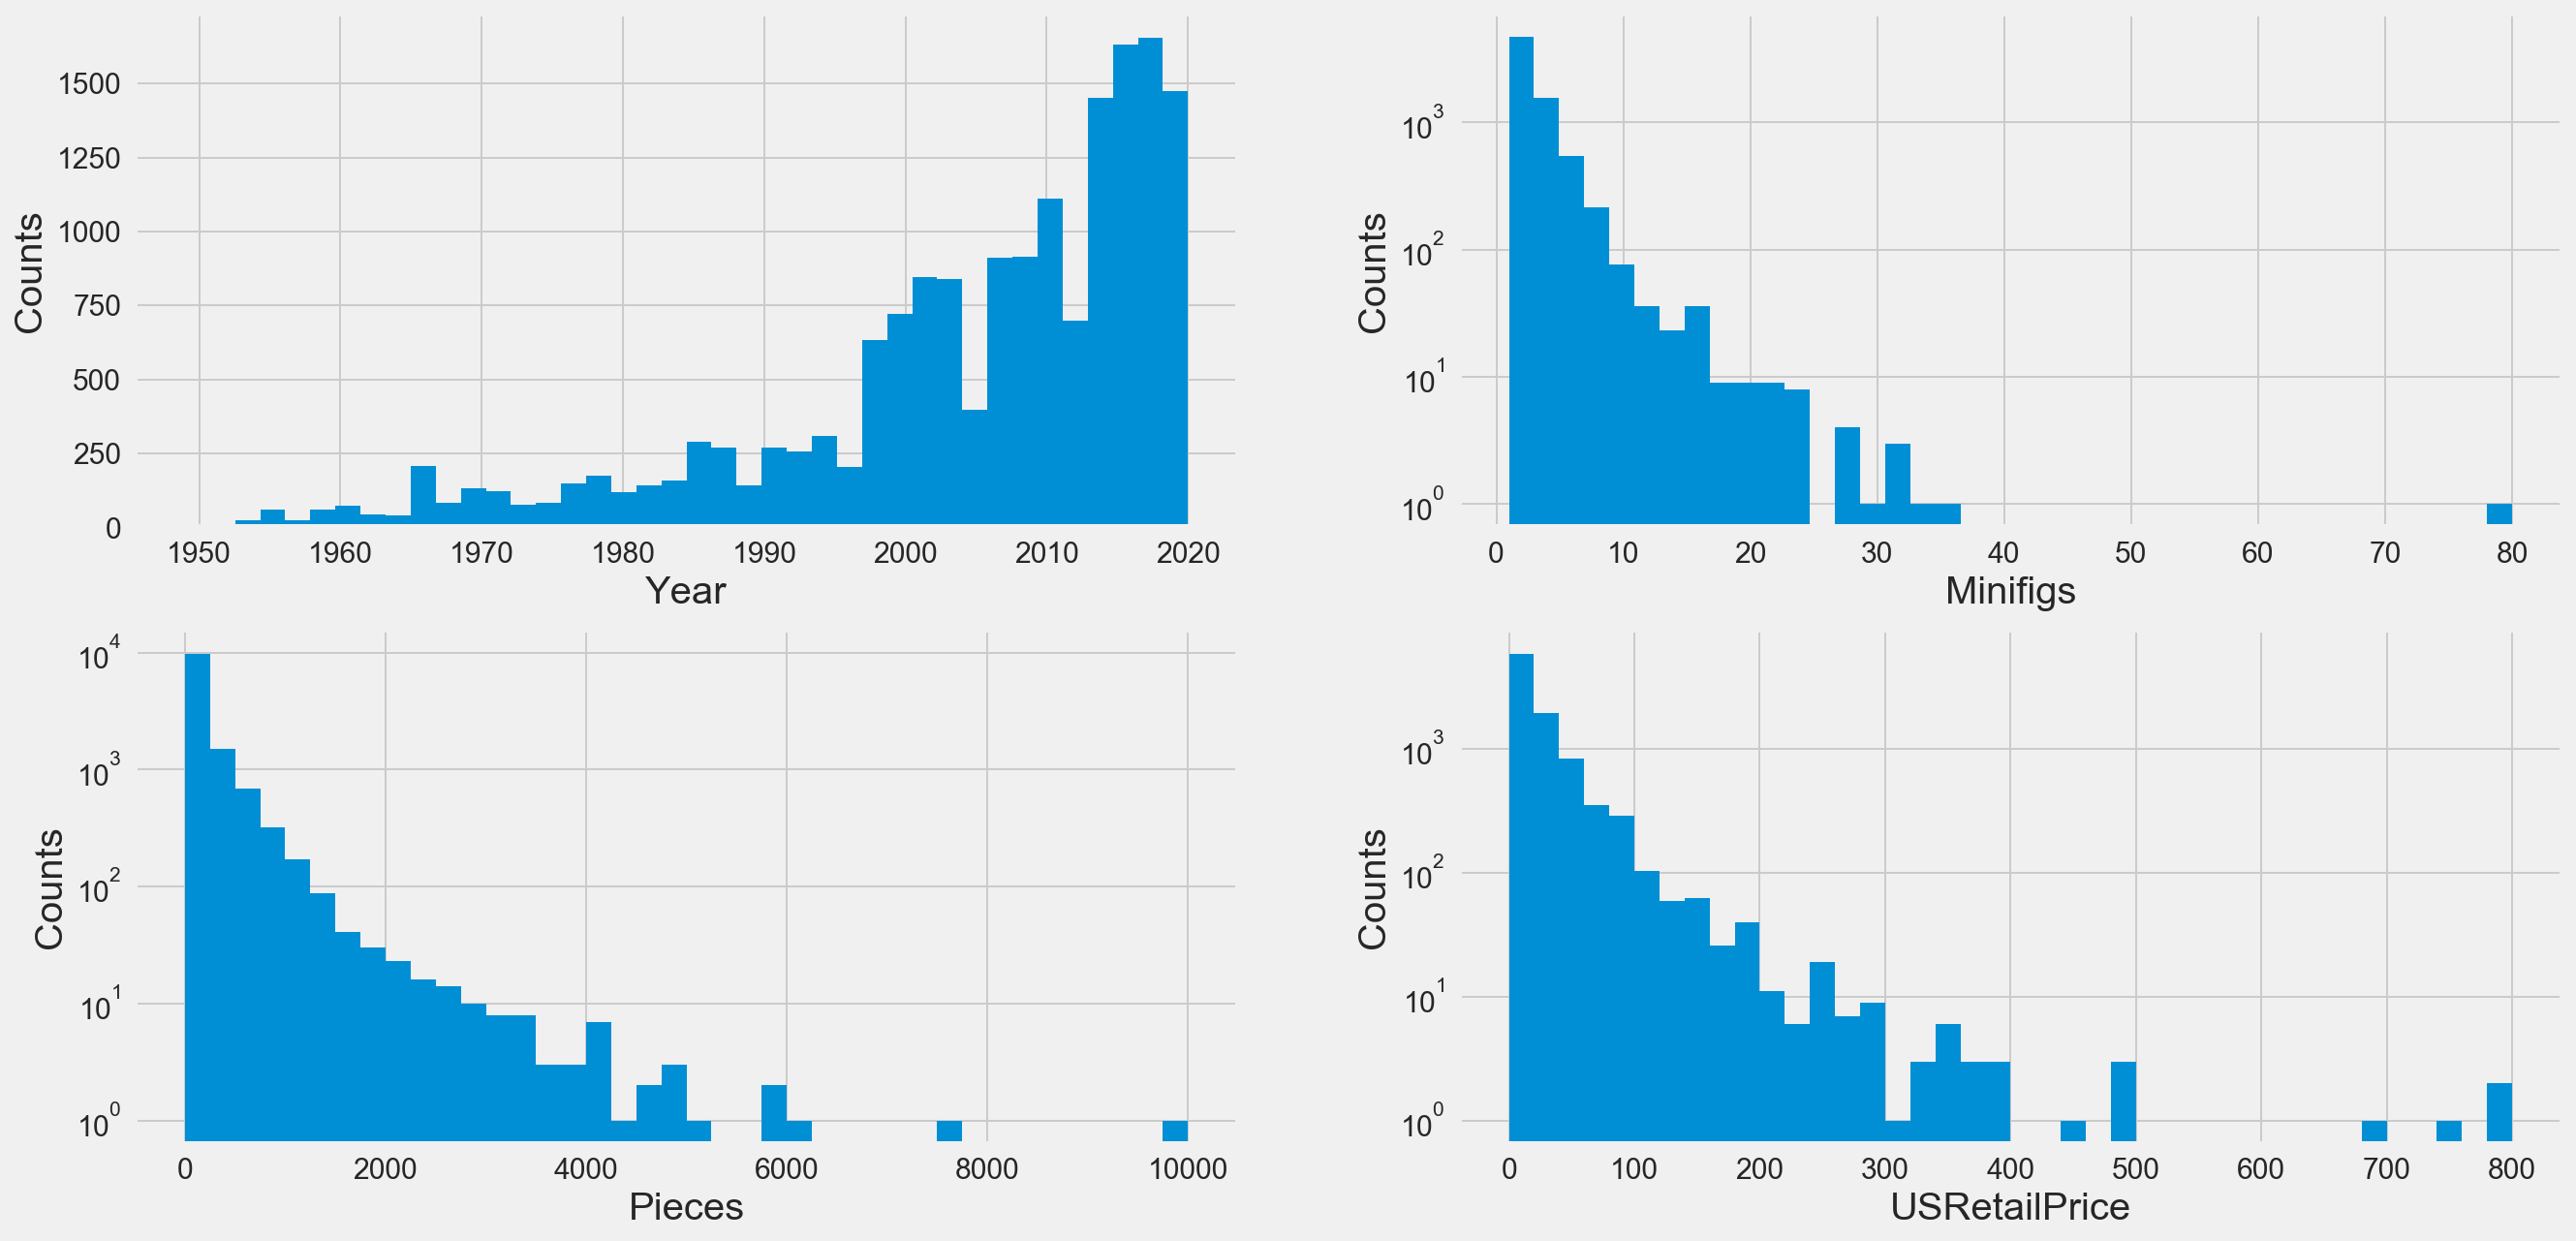

In [46]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
num_features = ['Year', 'Minifigs', 'Pieces', 'USRetailPrice'] # features of interest
axes = axes.ravel()
for i, ax in enumerate(axes):
    if i == 0:
        ax.hist(data[num_features[i]].dropna(), bins=40)
    else:
        ax.hist(data[num_features[i]].dropna(), bins=40, log=True)
    ax.set_xlabel(num_features[i], fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)


A large amount of sets have no pieces. These are either not sets (e.g. books, pens, video games) or the data is incomplete; either way we will discard them.

In [81]:
data = data[~(pd.isnull(data['Pieces']) | data['Pieces']==0)]
print('Table has shape:', data.shape)

Table has shape: (12811, 24)


## Visualizing categorical values: ThemeGroup
- ThemeGroup has 16 categories while Theme has 148

Text(0.5, 0, 'Count')

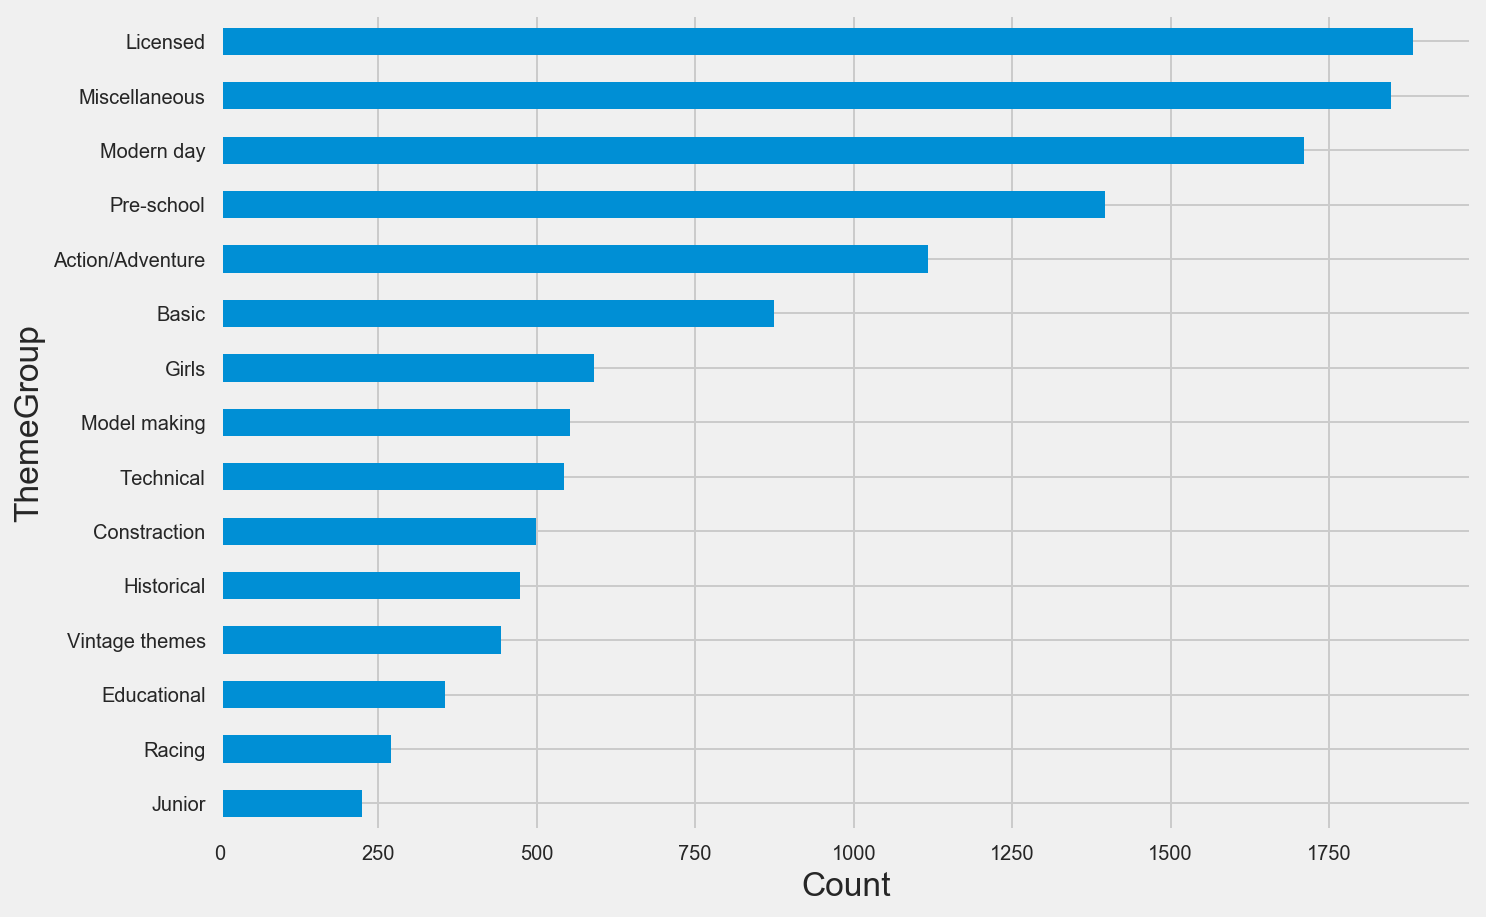

In [82]:
ax = data.groupby('ThemeGroup').size().sort_values().plot(kind='barh', figsize=(10,7))
ax.set_xlabel('Count')

## Are the numerical values correlated?

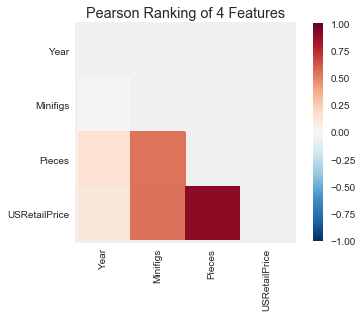

In [83]:
%matplotlib inline

from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette

X = data[num_features].dropna().to_numpy()

visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)
visualizer.transform(X)
visualizer.show()

A few things of note (that should be prior knowledge for Lego fans!):
- The number of pieces is strongly correlated with price
- Larger, more expensive sets are more likely to have more minifigures

More interestingly, there is a weak trend of sets getting bigger and more expensive over the years.

## Has price per piece increased over time?

Let's first look at the whole dataset. 

Since the first Lego themes were introduced in 1978, we must consider inflation--\\$1 in 1978 is worth a lot more than \\$1 in 2020. Luckily, I found a CSV file [here](https://www.in2013dollars.com/us/inflation/1978?amount=1) that lets us account for this.

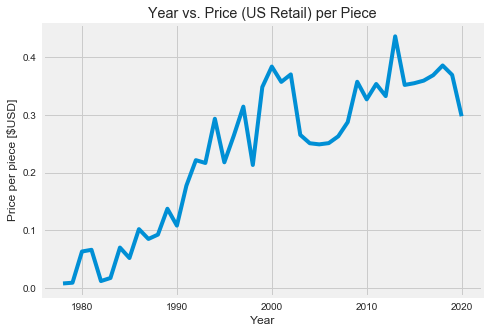

In [90]:
year_list = list(range(1978, 2021)) # The first Lego themes were introduced in 1978
inflation_data = pd.read_csv('inflation_data.csv')

def plot_ppp_list_all(): # ppp = price per piece
    ppp_list = []
    for year in year_list:
        year_data = data[data['Year'] == year]
        total_price = year_data['USRetailPrice'].sum(axis='index')
        total_pieces = year_data['Pieces'].sum(axis='index')
        inflation_price = inflation_data[inflation_data['year'] == year]['amount'].iat[0]
        ppp = total_price / total_pieces * inflation_price
        if ppp == 0:
            ppp = np.nan
        ppp_list.append(ppp)        
    plt.plot(year_list, ppp_list, label='Average')

plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel('Year')
plt.ylabel('Price per piece [$USD]')
plt.title('Year vs. Price (US Retail) per Piece')
plot_ppp_list_all()

The overall trend seems to be increasing. But some theme groups, such as Licensed, have a reputation in the Lego community for being more expensive than others. We'll see if it's a warranted belief.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


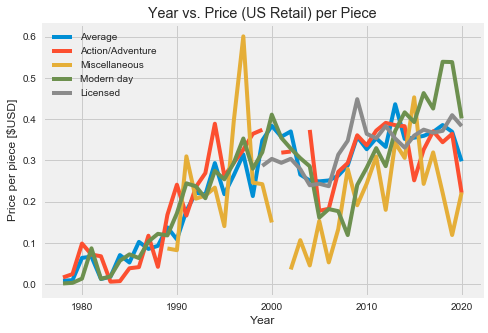

In [91]:
def plot_ppp_list(theme): 
    theme_data = data[data['ThemeGroup'] == theme]
    ppp_list = []
    for year in year_list:
        year_data = theme_data[theme_data['Year'] == year] # pandas df version of filter
        total_price = year_data['USRetailPrice'].sum(axis='index') # sum down the column
        total_pieces = year_data['Pieces'].sum(axis='index')
        inflation_price = inflation_data[inflation_data['year'] == year]['amount'].iat[0]
        ppp = total_price / total_pieces * inflation_price
        if ppp == 0:
            ppp = np.nan
        ppp_list.append(ppp)        
    plt.plot(year_list, ppp_list, label=theme)

plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel('Year')
plt.ylabel('Price per piece [$USD]')
plt.title('Year vs. Price (US Retail) per Piece')
plot_ppp_list_all()
plot_ppp_list("Action/Adventure")
plot_ppp_list("Miscellaneous")
plot_ppp_list("Modern day")
plot_ppp_list("Licensed")
plt.legend()


What's responsible for the spike in Miscellaneous at 1997? From the csv, some of the Service Packs seem to be driving up the average for that year. The set in row 7421, for example, is a one piece battery that sold for \\$5. 

![](1997.png)

Given occurrences like this, it might be best to exclude the Miscellaneous theme entirely. Here's the average ppp, but with Miscellaneous removed.

Table has shape: (10964, 24)


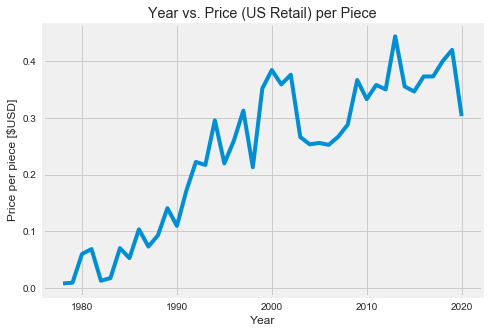

In [94]:
data = data[~(data['ThemeGroup'] == 'Miscellaneous')]
print('Table has shape:', data.shape)

plt.rcParams['figure.figsize'] = (7, 5)
plt.xlabel('Year')
plt.ylabel('Price per piece [$USD]')
plt.title('Year vs. Price (US Retail) per Piece')
plot_ppp_list_all()

Next: make a model to predict future price solely based on year

And then do one that takes into account year, minifigs, pieces